This notebook is used to compare the default TF-IDF preprocessor with the customn one.

In [18]:
from numpy import argmin
from text_embeddings.preprocessing.read_pdf import *
from user_interface.cli import *
from sklearn.feature_extraction.text import TfidfVectorizer
from text_embeddings.TFIDF.preprocessing.TfidfTextPreprocessor import *
from elasticSearch.queries.query_documents_tfidf import *

In [19]:
file_paths = glob.glob('/Users/klara/Documents/Uni/bachelorarbeit/data/0/*.pdf')
docs = get_docs_from_file_paths(file_paths)

The following TFIDF model is supposed to be used to find similar documents in a large corpus and thus, ignores unique (per document) words in its vocabulary.
Moreover, it aims to keep its vocabulary reasonably small.

### Default preprocessing
This sklearn model automatically turns the text into lowercase and removes punctuation, numbers, accents, stopwords.
It does not use n-gram, n>1, since it has proven to reduce the number of dimensions in the vocabulary/ vector and moreover, it enlargens the vocabulary.
# TODO: check if it also stems/ lemmatize the words
However, it does not seem to find word groups (e.g. aa, aaa).


In [20]:
default_tfidf = TfidfVectorizer(input='content', lowercase=True, min_df=3, max_df=int(len(docs)*0.07), analyzer='word', stop_words='english', token_pattern=r'(?u)\b[A-Za-z]+\b', strip_accents='ascii')
default_tfidf.fit(docs)

TfidfVectorizer(max_df=13, min_df=3, stop_words='english',
                strip_accents='ascii', token_pattern='(?u)\\b[A-Za-z]+\\b')

In [21]:
vocab_per_preprocessor = {}
vocab_per_preprocessor['default'] = default_tfidf.get_feature_names_out()
print('vocabulary: ', vocab_per_preprocessor['default'], '\nnumber of elements of vocabulary: ', len(vocab_per_preprocessor['default']))

vocabulary:  ['TM' 'aa' 'aaa' ... 'zero' 'zl' 'zurich'] 
number of elements of vocabulary:  1641


In [22]:
print('max df of vocabulary: ', int(len(docs)*0.04))

max df of vocabulary:  7


In [23]:
default_document_term_matrix = default_tfidf.fit_transform(docs).todense()

In [24]:
# all zero tf-idf document embeddings
get_num_all_zero_tfidf_embeddings(default_document_term_matrix, file_paths)

/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC34-38.pdf is all zero
/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC86-17.pdf is all zero
number of documents with all zero tf-idf values: 2 from 195


### Custom Preprocessing
This custom preprocessing includes the following steps:
- strip accents
- remove newlines
- lowercase
- discretize numbers
- remove punctuation
- change number encoding
- remove stopwords (english)
- lemmatize
- return text from list of tokens

In [25]:
# Example of custom preprocessor
sample_text = docs[0][:100] + '12312312. Today it is sunny! 212. Today it is rainy 123.123'
print('original sample text:\n', sample_text)
preProc = TfidfTextPreprocessor()
preprocessed_text = preProc.transform(sample_text)
print('\npreprocessed text:\n', preprocessed_text, '\n\n')

original sample text:
   
- THE COMMONWEALTH OF THE BAHAMAS 
The International Business Companies Act 2000; The Segregated 12312312. Today it is sunny! 212. Today it is rainy 123.123

preprocessed text:
      commonwealth bahamas  international business company act <SMALLNUMBER>  segregated <BIGNUMBER>  today sunny  <SMALLNUMBER>  today rainy <FLOAT> 




[nltk_data] Downloading package wordnet to /Users/klara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
custom_tfidf = TfidfVectorizer(input='content', preprocessor=TfidfTextPreprocessor().transform, min_df=3, max_df=int(len(docs)*0.07))
custom_document_term_matrix = custom_tfidf.fit_transform(docs).todense()

[nltk_data] Downloading package wordnet to /Users/klara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/klara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/klara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/klara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/klara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/klara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/klara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/klara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading 

In [27]:
vocab_per_preprocessor['custom'] = custom_tfidf.get_feature_names_out()
print('vocabulary: ', vocab_per_preprocessor['custom'], '\nnumber of elements of vocabulary: ', len(vocab_per_preprocessor['custom']))

vocabulary:  ['aa' 'aaa' 'abeyance' ... 'zero' 'zl' 'zurich'] 
number of elements of vocabulary:  1521


words in default vocabulary, which are not in custom

In [28]:
difference = set(vocab_per_preprocessor['default']) - set(vocab_per_preprocessor['custom'])
difference2 = set(vocab_per_preprocessor['custom']) - set(vocab_per_preprocessor['default'])

print(difference, difference2)

{'calculations', 'currencies', 'signatures', 'ts', 'po', 'q', 'sums', 'appendices', 'thing', 'sections', 'definitions', 'serves', 'provision', 'arts', 'le', 'conventions', 'advances', 'resolve', 'exchanges', 'maybe', 'institutions', 'ms', 'weekends', 'futures', 'stands', 'bodies', 'possessions', 'rates', 'trades', 'expression', 'notaries', 'dealers', 'respects', 'vouchers', 'positions', 'proportions', 'executor', 'defaults', 'secretaries', 'options', 'advisors', 'agents', 'dates', 'instructions', 'os', 'sources', 'providers', 'vehicles', 'consequences', 'kps', 'fines', 'bears', 'offices', 'damages', 'heads', 'issues', 'shareholdings', 'caves', 'policies', 'trustee', 'fractions', 'trusts', 'brokers', 'arbitrators', 'warrants', 'applicants', 'debenture', 'associations', 'mr', 'undertakings', 'party', 'dollar', 'entries', 'functions', 'bankers', 'authorizations', 'quarters', 'addenda', 'goes', 'exposes', 'islands', 'provider', 'formalities', 'equivalent', 'judgments', 'numbers', 'principl

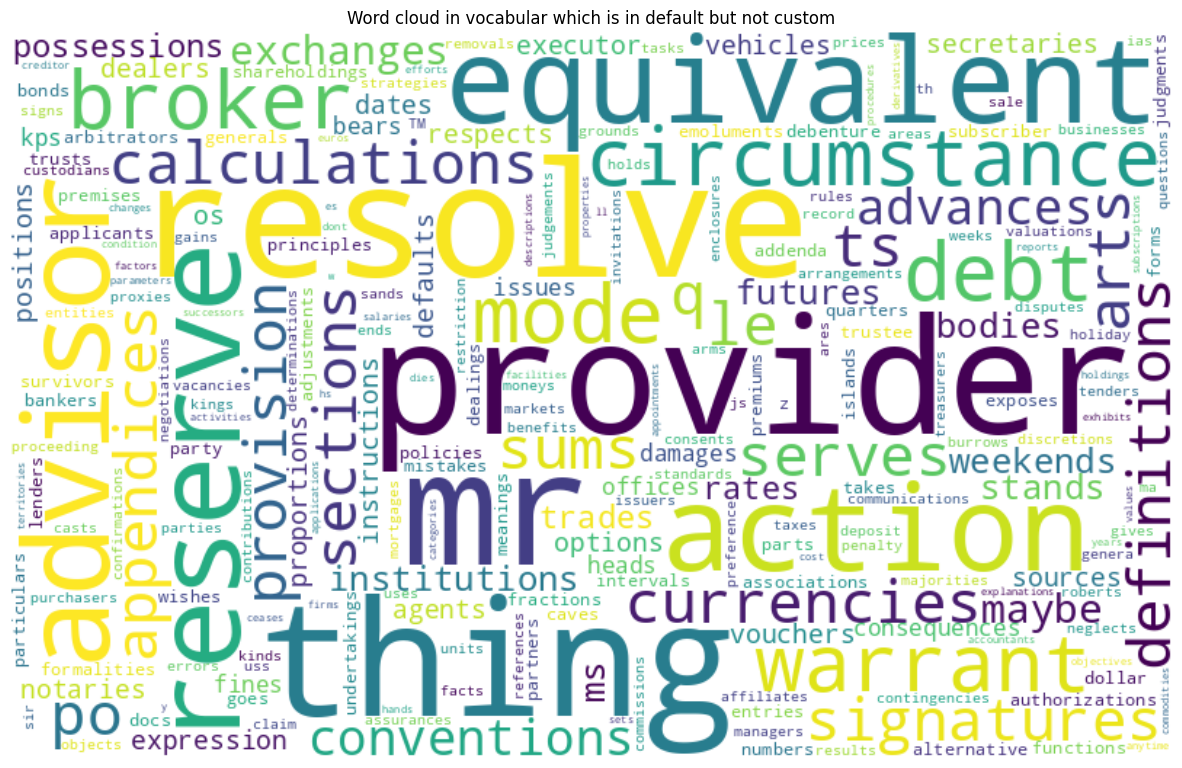

In [29]:
from text_visualizations import visualize_texts
visualize_texts.word_cloud(tokens=difference, file_name='vocabular which is in default but not custom', outpath = 'results', return_img=False)

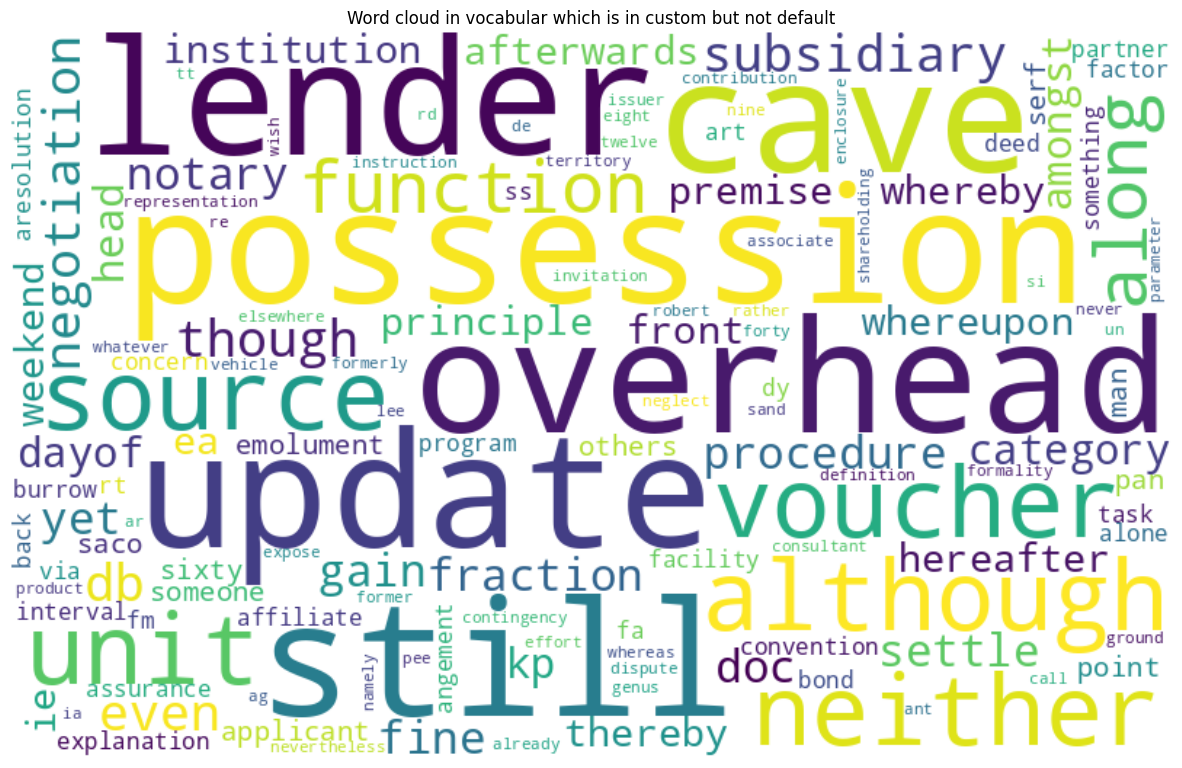

In [30]:
visualize_texts.word_cloud(tokens=difference2, file_name='vocabular which is in custom but not default', outpath = 'results', return_img=False)

In [31]:
# all zero tf-idf document embeddings
get_num_all_zero_tfidf_embeddings(custom_document_term_matrix, file_paths)

/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC34-38.pdf is all zero
/Users/klara/Documents/Uni/bachelorarbeit/data/0/SAC86-17.pdf is all zero
number of documents with all zero tf-idf values: 2 from 195


### Comparison default vs custom preprocessing

In [32]:

print('The smallest vocabulary is: ', list(vocab_per_preprocessor.keys())[argmin([len(vocab_per_preprocessor[p]) for p in list(vocab_per_preprocessor.keys())])])

for p in list(vocab_per_preprocessor.keys()):
    print('# words in the vocabulary of preprocessor ', p, ' is: ', len(vocab_per_preprocessor[p]))

The smallest vocabulary is:  custom
# words in the vocabulary of preprocessor  default  is:  1641
# words in the vocabulary of preprocessor  custom  is:  1521


### General tfidf/ document (statistical) properties

In [33]:
# returns tf-idf values for the first document with token human readable, but SORTED (≠ document vectorization)
print(get_tfidf_per_doc(custom_tfidf, 0, custom_document_term_matrix))

                   tfidf
innovatis       0.562122
authorisation   0.257765
ere             0.257765
aforementioned  0.248908
allocate        0.228415
...                  ...
entering        0.000000
enhanced        0.000000
enhance         0.000000
engraved        0.000000
zurich          0.000000

[1521 rows x 1 columns]


In [34]:
# document search engine using TF-IDF and cosine similarity
transformed_query = print_tfidf_transformation_example(tfidf=custom_tfidf, query='human readable Bahamas credit system')    # format: (doc_no, token_no) tfidf value
 
print_cosine_similarity_examples(transformed_query=transformed_query, document_term_matrix=custom_tfidf.fit_transform(docs))

transformation to (document number, token encoding) tf-idf score
   (0, 367)	1.0


[nltk_data] Downloading package wordnet to /Users/klara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/klara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/klara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/klara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/klara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/klara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/klara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/klara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading 

similarity between documents in trainings corpus:
 [[1.         0.         0.         ... 0.         0.15035504 0.        ]
 [0.         1.         0.         ... 0.03019025 0.         0.        ]
 [0.         0.         1.         ... 0.00957564 0.0086831  0.        ]
 ...
 [0.         0.03019025 0.00957564 ... 1.         0.         0.        ]
 [0.15035504 0.         0.0086831  ... 0.         1.         0.04232112]
 [0.         0.         0.         ... 0.         0.04232112 1.        ]]
similarity between documents in trainings corpus and query:
 [[0.        ]
 [0.        ]
 [0.        ]
 [0.01355946]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.42169256]
 [0.        ]
 [0.        ]
 [0.14632586]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.      